# Natural Language Processing using spacy

- Introduction of Spacy library
- Load english dictionary
- Find out stop words
- create an nlp object of given document (sentence)
- Count frequency of each word using hash values (using count_by(ORTH) and nlp.vocab.strings)
- print each word count, using dictionary comprehension
- print index of each token
- Print various attributes of nlp object (i.e. is_alpha,tok.shape_,is_stop,tok.pos_,tok.tag_) !!!
- Lemmatization
- Display tree view of words using displacy using displacy.render()
- How to get the meaning of any denoted words by nlp using explain(<word>)
- How to Find out NER(Named entity Recognition) in given doc
- Display Named Entity in doc using displacy.render
- Remove stop_words/punctuation using is_stop & is_punct attribute
- create a list of words/sentence after removing stop_words then make sentence
- Sentence and Word Tokenization
- Pipelining:
    - Get all the factory pipelining options available
    - How to disable preloaded pipeline, that will enahnce the processing time?
    - Adding custom pipelines
- Reading a file and displaying entity
- n-grams (using nltk and sklearn-CountVectorizer())
    - bi-grams
    - tri-grams
    - n-grams

In [116]:
# !pip install spacy

In [118]:
import spacy as sp
from spacy import displacy # used for data visualization
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.attrs import ORTH # to be used for word count

In [119]:
sp.__version__

'3.2.1'

In [120]:
nlp = sp.load("en_core_web_sm") 
# ref: https://spacy.io/models/en
# !python -m spacy download en_core_web_sm

###### To load english model

# !python -m spacy download en_core_web_sm

In [121]:
txt = """Commercial writers know that most people don’t want to read 1,000
words of closely-spaced text in order to see what they are writing about, so 
they also like to keep sentences and paragraphs short. 
They’ll even use lots of sub-headers so you can see what each paragraph is about 
before you read it. I need 1m dollar"""

## How to get all the words from text

In [122]:
obj = nlp(txt)

In [123]:
print(obj)

Commercial writers know that most people don’t want to read 1,000
words of closely-spaced text in order to see what they are writing about, so 
they also like to keep sentences and paragraphs short. 
They’ll even use lots of sub-headers so you can see what each paragraph is about 
before you read it. I need 1m dollar


In [125]:
for w in obj:
    print(type(w))
    break

<class 'spacy.tokens.token.Token'>


In [129]:
for w in obj:
    print(w.text)

Commercial
writers
know
that
most
people
do
n’t
want
to
read
1,000


words
of
closely
-
spaced
text
in
order
to
see
what
they
are
writing
about
,
so


they
also
like
to
keep
sentences
and
paragraphs
short
.


They
’ll
even
use
lots
of
sub
-
headers
so
you
can
see
what
each
paragraph
is
about


before
you
read
it
.
I
need
1
m
dollar


## Find out stop words

In [131]:
for w in obj:
    print((w,w.is_stop))

(Commercial, False)
(writers, False)
(know, False)
(that, True)
(most, True)
(people, False)
(do, True)
(n’t, True)
(want, False)
(to, True)
(read, False)
(1,000, False)
(
, False)
(words, False)
(of, True)
(closely, False)
(-, False)
(spaced, False)
(text, False)
(in, True)
(order, False)
(to, True)
(see, True)
(what, True)
(they, True)
(are, True)
(writing, False)
(about, True)
(,, False)
(so, True)
(
, False)
(they, True)
(also, True)
(like, False)
(to, True)
(keep, True)
(sentences, False)
(and, True)
(paragraphs, False)
(short, False)
(., False)
(
, False)
(They, True)
(’ll, True)
(even, True)
(use, False)
(lots, False)
(of, True)
(sub, False)
(-, False)
(headers, False)
(so, True)
(you, True)
(can, True)
(see, True)
(what, True)
(each, True)
(paragraph, False)
(is, True)
(about, True)
(
, False)
(before, True)
(you, True)
(read, False)
(it, True)
(., False)
(I, True)
(need, False)
(1, False)
(m, False)
(dollar, False)


In [134]:
print([w for w in obj if w.is_stop == True])

[that, most, do, n’t, to, of, in, to, see, what, they, are, about, so, they, also, to, keep, and, They, ’ll, even, of, so, you, can, see, what, each, is, about, before, you, it, I]


In [135]:
print([w for w in obj if w.is_stop == False])

[Commercial, writers, know, people, want, read, 1,000, 
, words, closely, -, spaced, text, order, writing, ,, 
, like, sentences, paragraphs, short, ., 
, use, lots, sub, -, headers, paragraph, 
, read, ., need, 1, m, dollar]


In [136]:
print(dir(obj))

['_', '__bytes__', '__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__ne__', '__new__', '__pyx_vtable__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__unicode__', '_bulk_merge', '_context', '_get_array_attrs', '_realloc', '_vector', '_vector_norm', 'cats', 'char_span', 'copy', 'count_by', 'doc', 'ents', 'extend_tensor', 'from_array', 'from_bytes', 'from_dict', 'from_disk', 'from_docs', 'get_extension', 'get_lca_matrix', 'has_annotation', 'has_extension', 'has_unknown_spaces', 'has_vector', 'is_nered', 'is_parsed', 'is_sentenced', 'is_tagged', 'lang', 'lang_', 'mem', 'noun_chunks', 'noun_chunks_iterator', 'remove_extension', 'retokenize', 'sentiment', 'sents', 'set_ents', 'set_extension', 'similarity', 'spans', 'tensor', 'text', 'text_with_ws', 

## create an nlp object of given document (sentence)

In [137]:
print(txt)

Commercial writers know that most people don’t want to read 1,000
words of closely-spaced text in order to see what they are writing about, so 
they also like to keep sentences and paragraphs short. 
They’ll even use lots of sub-headers so you can see what each paragraph is about 
before you read it. I need 1m dollar


In [138]:
w = nlp(txt)

In [139]:
for s in w.sents:
    print(s)
    

Commercial writers know that most people don’t want to read 1,000
words of closely-spaced text in order to see what they are writing about, so 
they also like to keep sentences and paragraphs short.

They’ll even use lots of sub-headers so you can see what each paragraph is about 
before you read it.
I need 1m dollar


In [140]:
for s in w.sents:
    print(s.text)
    

Commercial writers know that most people don’t want to read 1,000
words of closely-spaced text in order to see what they are writing about, so 
they also like to keep sentences and paragraphs short.

They’ll even use lots of sub-headers so you can see what each paragraph is about 
before you read it.
I need 1m dollar


In [141]:
for s in w.sents:
    print(s.text.split(" "))
    

['Commercial', 'writers', 'know', 'that', 'most', 'people', 'don’t', 'want', 'to', 'read', '1,000\nwords', 'of', 'closely-spaced', 'text', 'in', 'order', 'to', 'see', 'what', 'they', 'are', 'writing', 'about,', 'so', '\nthey', 'also', 'like', 'to', 'keep', 'sentences', 'and', 'paragraphs', 'short.']
['\nThey’ll', 'even', 'use', 'lots', 'of', 'sub-headers', 'so', 'you', 'can', 'see', 'what', 'each', 'paragraph', 'is', 'about', '\nbefore', 'you', 'read', 'it.']
['I', 'need', '1m', 'dollar']


## to create separate word from senetence

In [142]:
for s in w.sents:
    w = nlp(s.text)
    for word in w:
        print(word.text)
    

Commercial
writers
know
that
most
people
do
n’t
want
to
read
1,000


words
of
closely
-
spaced
text
in
order
to
see
what
they
are
writing
about
,
so


they
also
like
to
keep
sentences
and
paragraphs
short
.


They
’ll
even
use
lots
of
sub
-
headers
so
you
can
see
what
each
paragraph
is
about


before
you
read
it
.
I
need
1
m
dollar


## Count frequency of each word using hash values (using count_by(ORTH) and nlp.vocab.strings)

In [144]:
obj = nlp(txt)
obj

Commercial writers know that most people don’t want to read 1,000
words of closely-spaced text in order to see what they are writing about, so 
they also like to keep sentences and paragraphs short. 
They’ll even use lots of sub-headers so you can see what each paragraph is about 
before you read it. I need 1m dollar

In [148]:
d = obj.count_by(ORTH)
d

{6679199052911211715: 1,
 357501887436434592: 1,
 7743033266031195906: 1,
 4380130941430378203: 1,
 11104729984170784471: 1,
 7593739049417968140: 1,
 2158845516055552166: 1,
 16712971838599463365: 1,
 7597692042947428029: 1,
 3791531372978436496: 3,
 11792590063656742891: 2,
 18254674181385630108: 1,
 962983613142996970: 4,
 10289140944597012527: 1,
 886050111519832510: 2,
 9696970313201087903: 1,
 9153284864653046197: 2,
 16159022834684645410: 1,
 15099781594404091470: 1,
 3002984154512732771: 1,
 13136985495629980461: 1,
 11925638236994514241: 2,
 5865838185239622912: 2,
 16875582379069451158: 2,
 5012629990875267006: 1,
 9147119992364589469: 1,
 942632335873952620: 2,
 2593208677638477497: 1,
 9781598966686434415: 2,
 12084876542534825196: 1,
 18194338103975822726: 1,
 9099225972875567996: 1,
 5257340109698985342: 1,
 2283656566040971221: 1,
 12626284911390218812: 1,
 3563698965725164461: 1,
 12646065887601541794: 2,
 14947529218328092544: 1,
 17092777669037358890: 1,
 173392260459

In [149]:
for k,v in d.items():
    print((nlp.vocab.strings[k],v))

('Commercial', 1)
('writers', 1)
('know', 1)
('that', 1)
('most', 1)
('people', 1)
('do', 1)
('n’t', 1)
('want', 1)
('to', 3)
('read', 2)
('1,000', 1)
('\n', 4)
('words', 1)
('of', 2)
('closely', 1)
('-', 2)
('spaced', 1)
('text', 1)
('in', 1)
('order', 1)
('see', 2)
('what', 2)
('they', 2)
('are', 1)
('writing', 1)
('about', 2)
(',', 1)
('so', 2)
('also', 1)
('like', 1)
('keep', 1)
('sentences', 1)
('and', 1)
('paragraphs', 1)
('short', 1)
('.', 2)
('They', 1)
('’ll', 1)
('even', 1)
('use', 1)
('lots', 1)
('sub', 1)
('headers', 1)
('you', 2)
('can', 1)
('each', 1)
('paragraph', 1)
('is', 1)
('before', 1)
('it', 1)
('I', 1)
('need', 1)
('1', 1)
('m', 1)
('dollar', 1)


## print each word count, using dictionary comprehension

In [151]:
txt

'Commercial writers know that most people don’t want to read 1,000\nwords of closely-spaced text in order to see what they are writing about, so \nthey also like to keep sentences and paragraphs short. \nThey’ll even use lots of sub-headers so you can see what each paragraph is about \nbefore you read it. I need 1m dollar'

In [152]:
{w:txt.count(w) for w in txt.split(" ")}

{'Commercial': 1,
 'writers': 1,
 'know': 1,
 'that': 1,
 'most': 1,
 'people': 1,
 'don’t': 1,
 'want': 1,
 'to': 3,
 'read': 2,
 '1,000\nwords': 1,
 'of': 2,
 'closely-spaced': 1,
 'text': 1,
 'in': 2,
 'order': 1,
 'see': 2,
 'what': 2,
 'they': 2,
 'are': 1,
 'writing': 1,
 'about,': 1,
 'so': 3,
 '\nthey': 1,
 'also': 1,
 'like': 1,
 'keep': 1,
 'sentences': 1,
 'and': 1,
 'paragraphs': 1,
 'short.': 1,
 '\nThey’ll': 1,
 'even': 1,
 'use': 1,
 'lots': 1,
 'sub-headers': 1,
 'you': 2,
 'can': 1,
 'each': 1,
 'paragraph': 2,
 'is': 1,
 'about': 2,
 '\nbefore': 1,
 'it.': 1,
 'I': 1,
 'need': 1,
 '1m': 1,
 'dollar': 1}

## print index and offset index of each token

In [153]:
w = nlp(txt)
w

Commercial writers know that most people don’t want to read 1,000
words of closely-spaced text in order to see what they are writing about, so 
they also like to keep sentences and paragraphs short. 
They’ll even use lots of sub-headers so you can see what each paragraph is about 
before you read it. I need 1m dollar

In [ ]:
i = index of a word in parent string
idx = offset from the parent string

In [157]:
for word in w:
    print((word.text,word.i,word.idx))

('Commercial', 0, 0)
('writers', 1, 11)
('know', 2, 19)
('that', 3, 24)
('most', 4, 29)
('people', 5, 34)
('do', 6, 41)
('n’t', 7, 43)
('want', 8, 47)
('to', 9, 52)
('read', 10, 55)
('1,000', 11, 60)
('\n', 12, 65)
('words', 13, 66)
('of', 14, 72)
('closely', 15, 75)
('-', 16, 82)
('spaced', 17, 83)
('text', 18, 90)
('in', 19, 95)
('order', 20, 98)
('to', 21, 104)
('see', 22, 107)
('what', 23, 111)
('they', 24, 116)
('are', 25, 121)
('writing', 26, 125)
('about', 27, 133)
(',', 28, 138)
('so', 29, 140)
('\n', 30, 143)
('they', 31, 144)
('also', 32, 149)
('like', 33, 154)
('to', 34, 159)
('keep', 35, 162)
('sentences', 36, 167)
('and', 37, 177)
('paragraphs', 38, 181)
('short', 39, 192)
('.', 40, 197)
('\n', 41, 199)
('They', 42, 200)
('’ll', 43, 204)
('even', 44, 208)
('use', 45, 213)
('lots', 46, 217)
('of', 47, 222)
('sub', 48, 225)
('-', 49, 228)
('headers', 50, 229)
('so', 51, 237)
('you', 52, 240)
('can', 53, 244)
('see', 54, 248)
('what', 55, 252)
('each', 56, 257)
('paragraph', 

## Print various attributes of nlp object (i.e. is_alpha,tok.shape_,is_stop,tok.pos_,tok.tag_) !!!

In [166]:
for word in w:
    print((word.text,word.shape,word.shape_,word.is_alpha,word.pos,word.pos_,word.tag,word.tag_))

('Commercial', 16072095006890171862, 'Xxxxx', True, 84, 'ADJ', 10554686591937588953, 'JJ')
('writers', 13110060611322374290, 'xxxx', True, 92, 'NOUN', 783433942507015291, 'NNS')
('know', 13110060611322374290, 'xxxx', True, 100, 'VERB', 9188597074677201817, 'VBP')
('that', 13110060611322374290, 'xxxx', True, 98, 'SCONJ', 1292078113972184607, 'IN')
('most', 13110060611322374290, 'xxxx', True, 84, 'ADJ', 14753207560692742245, 'JJS')
('people', 13110060611322374290, 'xxxx', True, 92, 'NOUN', 783433942507015291, 'NNS')
('do', 4370460163704169311, 'xx', True, 87, 'AUX', 9188597074677201817, 'VBP')
('n’t', 6415657131683920182, 'x’x', False, 94, 'PART', 164681854541413346, 'RB')
('want', 13110060611322374290, 'xxxx', True, 100, 'VERB', 14200088355797579614, 'VB')
('to', 4370460163704169311, 'xx', True, 94, 'PART', 5595707737748328492, 'TO')
('read', 13110060611322374290, 'xxxx', True, 100, 'VERB', 14200088355797579614, 'VB')
('1,000', 8163372826296935398, 'd,ddd', False, 93, 'NUM', 84272166795

# How shape is determined

<div> 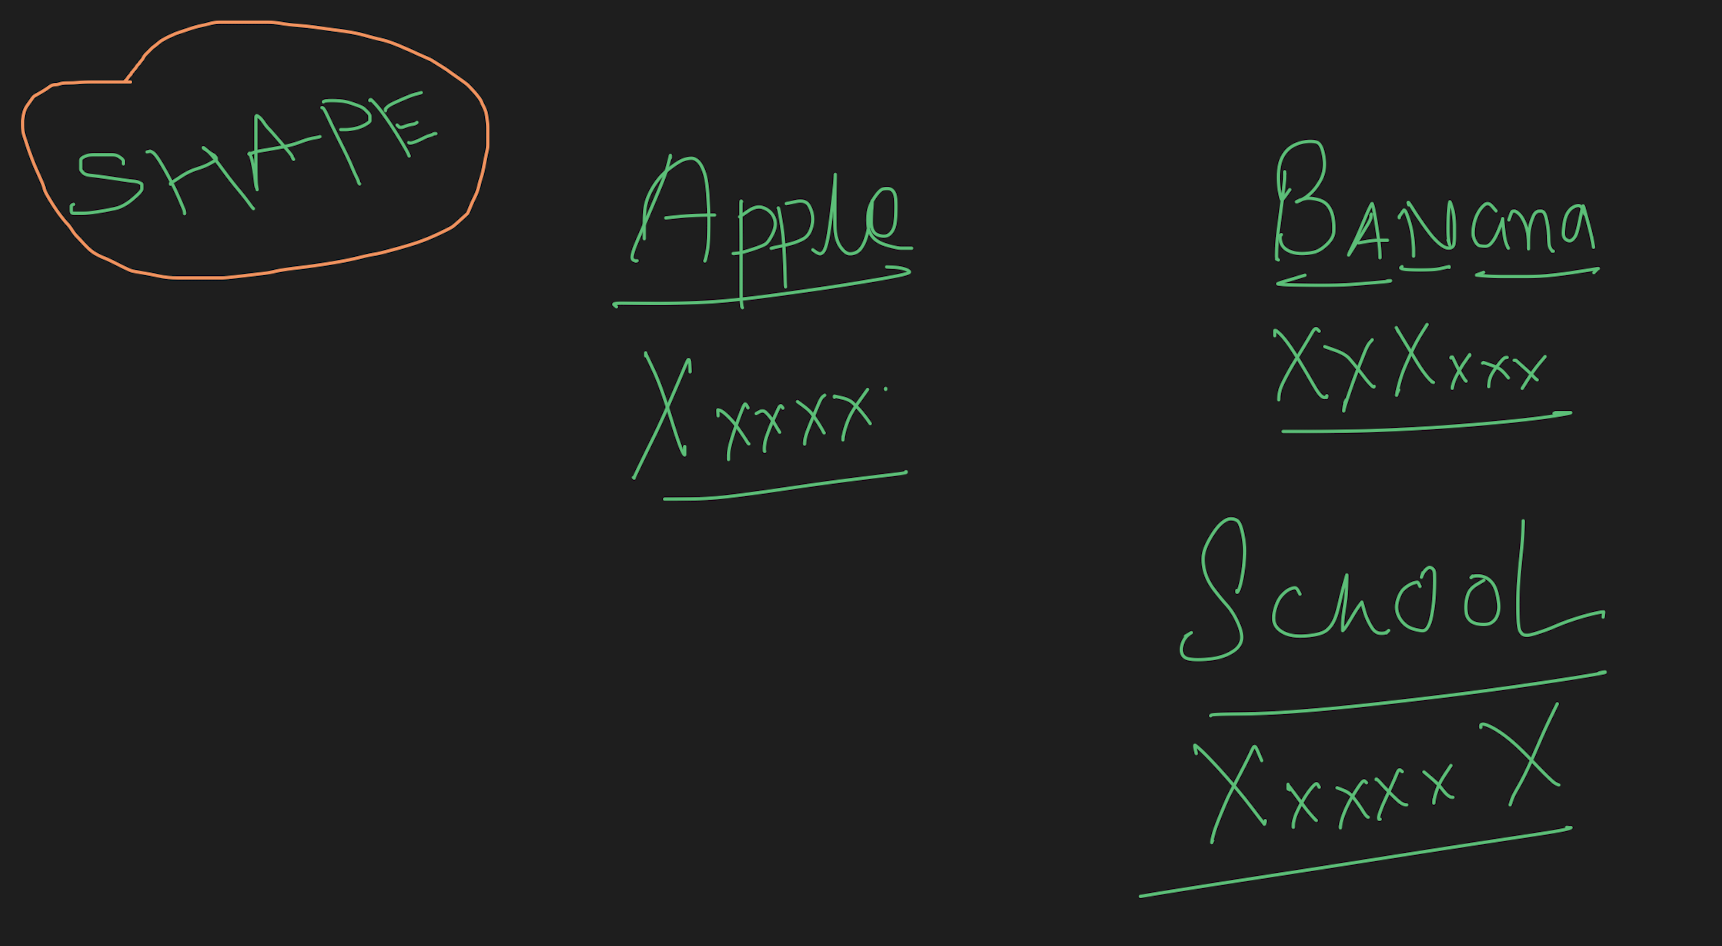 </div>

# Get meaning of POS or TAG

In [168]:
for word in w:
    print((word.pos_,sp.explain(word.pos_)))

('ADJ', 'adjective')
('NOUN', 'noun')
('VERB', 'verb')
('SCONJ', 'subordinating conjunction')
('ADJ', 'adjective')
('NOUN', 'noun')
('AUX', 'auxiliary')
('PART', 'particle')
('VERB', 'verb')
('PART', 'particle')
('VERB', 'verb')
('NUM', 'numeral')
('SPACE', 'space')
('NOUN', 'noun')
('ADP', 'adposition')
('ADV', 'adverb')
('PUNCT', 'punctuation')
('VERB', 'verb')
('NOUN', 'noun')
('ADP', 'adposition')
('NOUN', 'noun')
('PART', 'particle')
('VERB', 'verb')
('PRON', 'pronoun')
('PRON', 'pronoun')
('AUX', 'auxiliary')
('VERB', 'verb')
('ADP', 'adposition')
('PUNCT', 'punctuation')
('CCONJ', 'coordinating conjunction')
('SPACE', 'space')
('PRON', 'pronoun')
('ADV', 'adverb')
('VERB', 'verb')
('PART', 'particle')
('VERB', 'verb')
('NOUN', 'noun')
('CCONJ', 'coordinating conjunction')
('NOUN', 'noun')
('ADJ', 'adjective')
('PUNCT', 'punctuation')
('SPACE', 'space')
('PRON', 'pronoun')
('AUX', 'auxiliary')
('ADV', 'adverb')
('VERB', 'verb')
('NOUN', 'noun')
('ADP', 'adposition')
('NOUN', 'nou

In [169]:
for word in w:
    print((word.pos_,sp.explain(word.tag_)))

('ADJ', 'adjective (English), other noun-modifier (Chinese)')
('NOUN', 'noun, plural')
('VERB', 'verb, non-3rd person singular present')
('SCONJ', 'conjunction, subordinating or preposition')
('ADJ', 'adjective, superlative')
('NOUN', 'noun, plural')
('AUX', 'verb, non-3rd person singular present')
('PART', 'adverb')
('VERB', 'verb, base form')
('PART', 'infinitival "to"')
('VERB', 'verb, base form')
('NUM', 'cardinal number')
('SPACE', 'whitespace')
('NOUN', 'noun, plural')
('ADP', 'conjunction, subordinating or preposition')
('ADV', 'adverb')
('PUNCT', 'punctuation mark, hyphen')
('VERB', 'verb, past participle')
('NOUN', 'noun, singular or mass')
('ADP', 'conjunction, subordinating or preposition')
('NOUN', 'noun, singular or mass')
('PART', 'infinitival "to"')
('VERB', 'verb, base form')
('PRON', 'wh-pronoun, personal')
('PRON', 'pronoun, personal')
('AUX', 'verb, non-3rd person singular present')
('VERB', 'verb, gerund or present participle')
('ADP', 'conjunction, subordinating or